#### Define the State

In [3]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

#### Define The Nodes

In [73]:
def order(state:State):
    print("Order Node Has been Triggered")
    return {"graph_info":state["graph_info"] + " I want to order the food"}

def veg(state:State):
    print("Veg Node Has been Triggered")
    return {"graph_info":state["graph_info"] + " veg"}

def nonveg(state:State):
    print("Nonveg Node Has been Triggered")
    return {"graph_info":state["graph_info"] + " nonveg"}

#### decide Function

In [74]:
import random
from typing import Literal

def decide(state:State)->Literal['veg','nonveg']:
    if random.random() > 0.5:
        return 'veg'
    else:
        return 'nonveg'

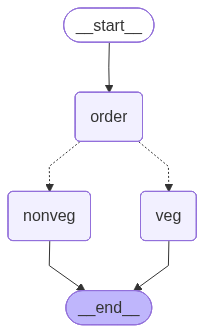

In [75]:
from IPython.display import display, Image
from langgraph.graph import StateGraph,START,END

## Define the state
graph = StateGraph(State)

## Define the Nodes
graph.add_node("order",order)
graph.add_node("veg",veg)
graph.add_node("nonveg",nonveg)

### Define the Nodes

graph.add_edge(START,"order")
graph.add_conditional_edges("order",decide)
graph.add_edge("veg",END)
graph.add_edge("nonveg",END)

## Complie the graph
graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [76]:
graph_builder.invoke({
    "graph_info":"My Name is Husen"
})

Order Node Has been Triggered
Nonveg Node Has been Triggered


{'graph_info': 'My Name is Husen I want to order the food nonveg'}